In [2]:
#import relevant modules first
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
# Constants
G = 6.672e-11  # Gravitational constant in m^3/(kg*s)
RK = 3100e3  # Radius of the Earth's core in meters
rhoK = 12.3e3  # Constant density of the Earth's core in kg/m^3
RM = 6371e3  # Outer radius of the mantle in meters
rhoM = 4.8e3  # Constant density of the mantle in kg/m^3

Total mass M = 6.13531e+24 kg
Constant mean density ρ = 5664.01947 kg/m^3

 Wiechert Earth model:
   r = 0.0 km -> V (core) = nan
   r = 1000.0 km -> V (core) = 3.43755581e+06
   r = 2000.0 km -> V (core) = 1.37502233e+07
   r = 3000.0 km -> V (core) = 3.09380023e+07
   r = 4000.0 km -> V (core) = -3.29489725e+07
   r = 5000.0 km -> V (core) = -7.93559760e+07
   r = 6000.0 km -> V (core) = -1.36075647e+08
   r = 4000.0 km -> V (mantle) = -3.29489725e+07
   r = 5000.0 km -> V (mantle) = -7.93559760e+07
   r = 6000.0 km -> V (mantle) = -1.36075647e+08

 Homogeneous Earth model:
   r = 0.0 km -> V = 5.51565843e+07
   r = 1000.0 km -> V = 5.51565843e+07
   r = 2000.0 km -> V = 5.51565843e+07
   r = 3000.0 km -> V = 5.51565843e+07
   r = 4000.0 km -> V = 5.39307693e+07
   r = 5000.0 km -> V = 5.03575379e+07
   r = 6000.0 km -> V = 4.50080271e+07
   r = 7000.0 km -> V = 4.38484756e+07
   r = 8000.0 km -> V = 3.83674161e+07
   r = 9000.0 km -> V = 3.41043699e+07
   r = 10000.0 km -> V = 3.069

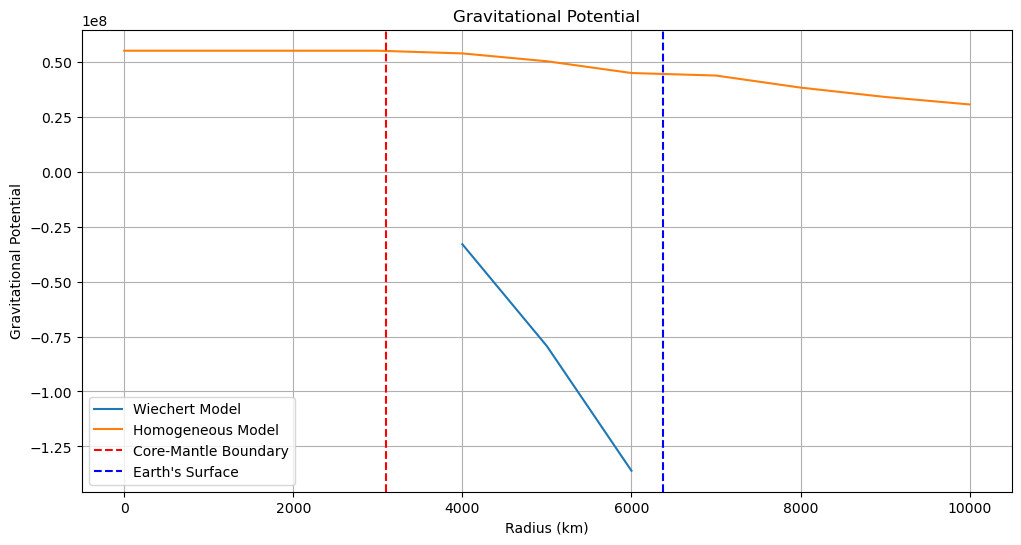

In [22]:
# Function to calculate total mass of the Earth in Wiechert's Earth model
def total_mass():
    MK = (4/3) * np.pi * rhoK * RK**3
    MM = (4/3) * np.pi * rhoM * (RM**3 - RK**3)
    M = MK + MM
    return M

# Function to calculate constant mean density of a homogeneous Earth
def mean_density(M):
    rho_mean = M / ((4/3) * np.pi * RM**3) #in case of homogeneous Earth, Rk = 0 and RM = R
    return rho_mean

def gravitational_fields(r, model, layer):
    G = 6.672e-11  # Gravitational constant in m^3/(kg*s)
    RK = 3100e3  # Radius of the Earth's core in meters
    rhoK = 12.3e3  # Constant density of the Earth's core in kg/m^3
    RM = 6371e3  # Outer radius of the mantle in meters
    rhoM = 4.8e3  # Constant density of the mantle in kg/m^3

    potentials = []
    
    for r in r:
        if model == "Wiechert":
            if layer == "core":
                if r < RK:
                    ViK = (G * (4/3) * rhoK * np.pi * r** 3) / r
                    potentials.append(ViK)
                elif RK <= r <= RM:
                    VoK = (2 * np.pi * G * rhoK * (RK ** 2 - r ** 2))
                    potentials.append(VoK)
                elif r == RM:
                    VM = (2 * np.pi * G * rhoM * (r ** 2 - RK ** 2))
                    potentials.append(VM)
            
            if layer == "mantle":
                if r==RK:
                    VK = (G * 4 * np.pi * rhoK * RK ** 3) / (3 * r)
                    potentials.append(ViK)
                elif RK <= r <= RM:
                    VoK = (2 * np.pi * G * rhoK * (RK ** 2 - r ** 2))
                    potentials.append(VoK)
                elif r == RM:
                    VM = (2 * np.pi * G * rhoM * (r ** 2 - RK ** 2))
                    potentials.append(VM)


        elif model == "Homogeneous":
            M = (4 / 3) * np.pi * rhoM * (RM ** 3 - RK ** 3)
            rho = M / (4 / 3 * np.pi * RM ** 3)
            if r < RK:
                ViK = (2 * np.pi * G * rho * (RM ** 2 - RK ** 2))
                potentials.append(ViK)

            elif RK <= r <= RM:
                VoK = (2 * np.pi * G * rho * (RM ** 2 - (2 / (3 * r)) * RK ** 3 - (1 / 3) * r ** 2))
                potentials.append(VoK)

            elif r > RM:
                VM = ((4 / (3 * r)) * np.pi * G * rhoM * (RM ** 3 - RK ** 3))
                potentials.append(VM)

    return potentials

# Calculate total mass and mean density
M = total_mass()
rho = mean_density(M)

# Display results for total mass and mean constant density
print(f"Total mass M = {M:.5e} kg")
print(f"Constant mean density ρ = {rho:.5f} kg/m^3")

# Calculate gravitational potential in steps of 1000 km
r_values = np.arange(0, 10001e3, 1000e3)

for model in ["Wiechert", "Homogeneous"]:
    print(f"\n {model} Earth model:")
    if model == "Wiechert":
        for layer in ["core", "mantle"]:
            for r in r_values:
                V = gravitational_fields([r], model, layer)
                print(f"   r = {r/1e3:.1f} km -> V ({layer}) = {V[0]:.8e}")
          
    else:  # Homogeneous model doesn't require layer argument
        for r in r_values:
            V = gravitational_fields([r], model, layer)
            print(f"   r = {r/1e3:.1f} km -> V = {V[0]:.8e}")
       
# Arrays to store potential values for plotting
Wiechert_potentials = []
Homogeneous_potentials = []

for r in r_values:
    V_Wiechert = gravitational_fields([r], "Wiechert", layer)
    if V_Wiechert:  # Check if V_Wiechert is not empty
        Wiechert_potentials.append(V_Wiechert[0])
    else:
        Wiechert_potentials.append(np.nan)  # Append NaN for values where calculation failed
    
    V_Homogeneous = gravitational_fields([r], "Homogeneous", layer)
    if V_Homogeneous:  # Check if V_Homogeneous is not empty
        Homogeneous_potentials.append(V_Homogeneous[0])
    else:
        Homogeneous_potentials.append(np.nan)  # Append NaN for values where calculation failed

        
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(r_values / 1e3, Wiechert_potentials, label="Wiechert Model")
plt.plot(r_values / 1e3, Homogeneous_potentials, label="Homogeneous Model")

plt.axvline(x=RK/1e3, linestyle='--', color='r', label='Core-Mantle Boundary')
plt.axvline(x=RM/1e3, linestyle='--', color='b', label="Earth's Surface")

plt.title("Gravitational Potential")
plt.xlabel("Radius (km)")
plt.ylabel("Gravitational Potential")
plt.grid(True)
plt.legend()
plt.show()